![alt text](https://i.imgur.com/1WaY7aA.png)

# Data Science and AI
## Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')



## ANSWER

# Step 2 (Answer): Find the Data
[Blood Transfusion Service Center Data Set](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)

## Title: Blood Transfusion Service Center Dataset
[Link](https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.names)

**Abstract**: Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.
- Data Set Characteristics: Multivariate
- Number of Instances: 748
- Area: Business
- Attribute Characteristics: Real
- Number of Attributes: 5
- Date Donated: 2008-10-03
- Associated Tasks: Classification
- Missing Values? N/A

**Source**:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.
        e-mail:icyeh 'at' chu.edu.tw
        Tel: 886-3-5186511
        Date Donated: October 3, 2008 

**Data Set Information**:
- To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database.
- These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

**Attribute Information**:
- Given is the variable name, variable type, the measurement unit and a brief description. The "Blood Transfusion Service Center" is a classification problem.
- The order of this listing corresponds to the order of numerals along the rows of the database.
    - **Recency (R)**: months since last donation
    - **Frequency (F)**: total number of donation
    - **Monetary (M)**: total blood donated in c.c. ($cm^3$)
    - **Time (T)**): months since first donation
    - a binary variable representing whether the person donated blood in March 2007 (1: donated blood; 0: did not donate blood).

**Table 1** shows the descriptive statistics of the data. We selected 500 data at random as the training set, and the rest 248 as the testing set.

| Variable | Data Type | Measurement | Description | min | max | mean | std |
|:---|:---|:---|:---|---:|---:|---:|---:|
| Recency | quantitative | Months | Input | 0.03 | 74.4 | 9.74 | 8.07 |
| Frequency | quantitative | Times | Input | 1 | 50 | 5.51 | 5.84 |
| Monetary | quantitative | c.c. blood | Input | 250 | 12500 | 1378.68 | 1459.83 |
| Time | quantitative | Months | Input | 2.27 | 98.3 | 34.42 | 24.32 |
| Whether he/she donated blood in March 2007 | binary | 1=yes 0=no | Output | 0 | 1 | 1 (24%) | 0 (76%) |
_Table 1. Descriptive statistics of the data_

**Citation Request**:
- **NOTE**: Reuse of this database is unlimited with retention of copyright notice for 
Prof. I-Cheng Yeh and the following published paper:

    Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM 
    model using Bernoulli sequence, "Expert Systems with Applications, 2008 
    (doi:10.1016/j.eswa.2008.07.018).
    
**Data**:
- [Download](https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/)

# Step 2: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

**1. Potential Question**
- Will the person donate in March 2007
- Will the person donate at the next orportunity

**2. Actual Question**
- Will the person donate in March 2007


# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [29]:
file = '../DATA/transfusion_data.csv'
transfusion = pd.read_csv(file)

In [30]:
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [31]:
# ANSWER
# Number of Features = 4, Target = 1
# data types = All integer
transfusion.dtypes
transfusion.columns = ['Recency', 'Frequency', 'Monetary', 'Time','Donated']

In [32]:
transfusion.describe()
# There are significantly large values in each feature, that could be considered outliers, 
# but they may be legitamate.

,Recency,Frequency,Monetary,Time,Donated
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [33]:
transfusion.isnull().sum()
# No NUll values

Recency      0
Frequency    0
Monetary     0
Time         0
Donated      0
dtype: int64

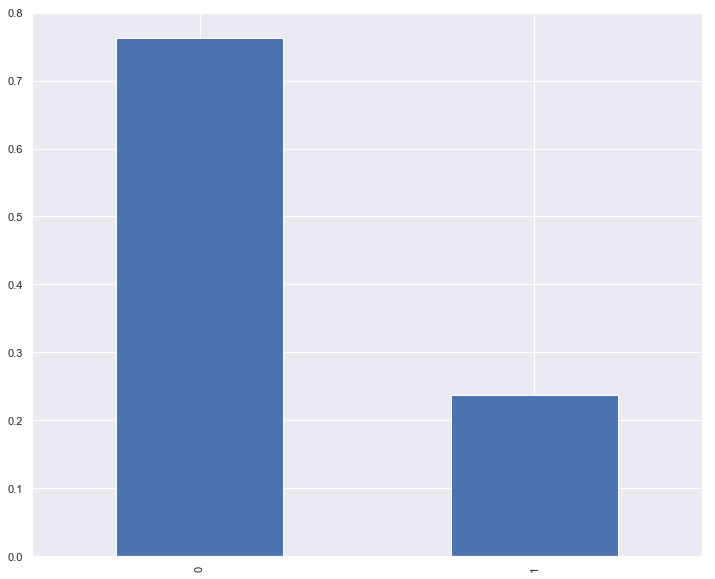

In [34]:
transfusion['Donated'].value_counts(normalize=True).plot(kind='bar',figsize=(12,10));

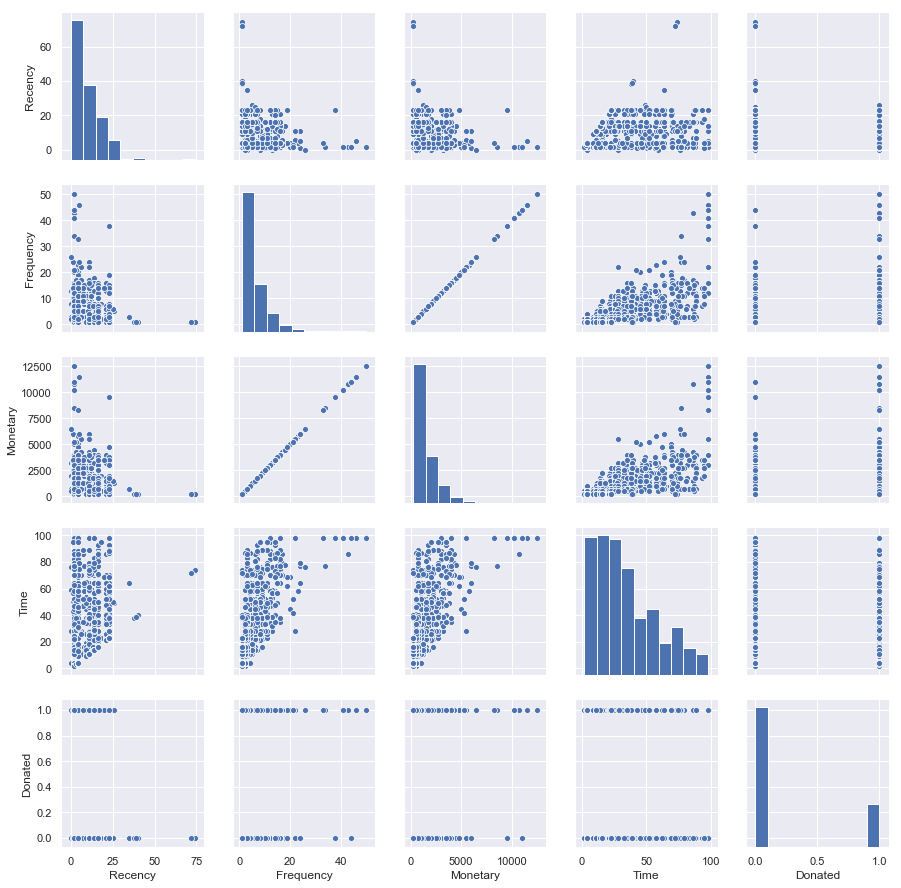

In [35]:
sns.pairplot(transfusion);

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [36]:
# ANSWER
features = ['Recency', 'Frequency', 'Monetary', 'Time']
outcome = 'Donated'

X = transfusion[features]
# Convert the Donated column to a string
y = transfusion[outcome].astype(str)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

- The input variables are `Recency`, `Frequency`, `Monetary`, `Time'.
- The output variable is `Donated`
- The output variable is a classification on `yes` or `no`
- The modelling is **Supervised, Binary classification**

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Find Target
- Find Features
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [37]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

    DecisionTreeClassifier

In [38]:
# ANSWER
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()


# Step 9: Fit the Model

In [39]:
# ANSWER

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

**Appropriate metrics**
- Confusion matrix
- ROC curve

In [40]:
def train_predict_model(features, target):
    
    clf = DecisionTreeClassifier()
    
    clf.fit(features, target)
    
    return clf, clf.predict(features)
    
clf, pred = train_predict_model(X_train, y_train)

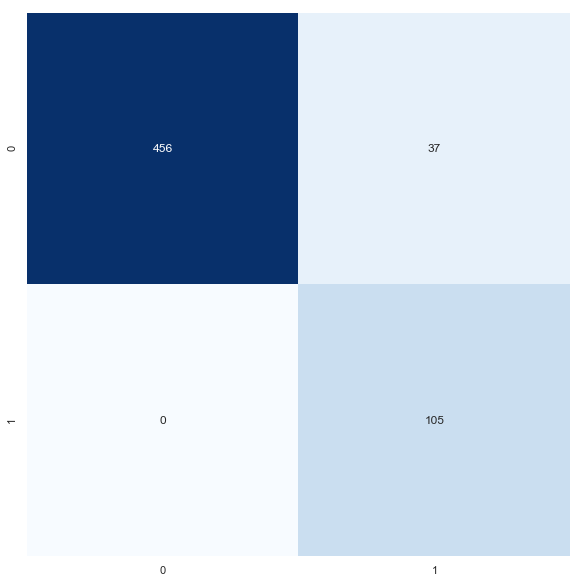

In [41]:
# ANSWER

def plot_confusion(actual, predicted):
    mat = confusion_matrix(actual, predicted)

    # Confusion Matrix
    plt.figure(figsize=(12,10))
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues')

plot_confusion(y_train, pred)

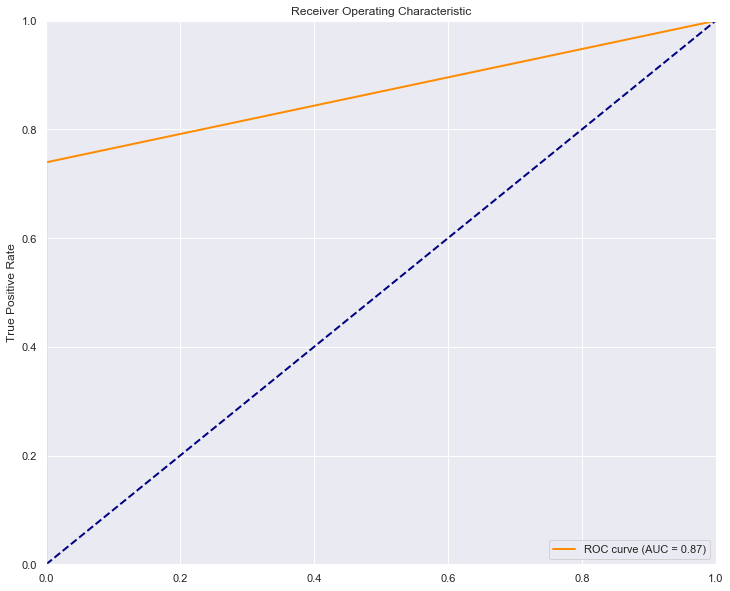

In [42]:

def plot_roc_curve(actual, predicted):
    actual = actual.astype(int)
    predicted = predicted.astype(int)

    precision, recall, _ = precision_recall_curve(actual, predicted)
    average_precision = average_precision_score(actual, predicted)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, predicted)
    roc_auc = auc(fpr, tpr)

    # ROC
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right');
    
plot_roc_curve(y_train, pred)

In [43]:
def best_tree_model(features, target):
    
    
    max_depth = [3,5,7,9, 10, 20, 30, 50,]
    min_samples_split = [2,3,4,5]
    max_features  = [0.25,0.5,0.75,1]
    
    best_score = 0
    
    for depth in max_depth:
        for split in min_samples_split:
            for feature in max_features:
                
                clf = DecisionTreeClassifier(max_depth=depth,min_samples_split=split,max_features=feature)

                clf.fit(features, target)

                score = clf.score(features, target)
                    
                if score > best_score:
                    model = DecisionTreeClassifier(max_depth=depth,min_samples_split=split,max_features=feature)
                    
                    
    model.fit(features, target)
    
    return model, model.predict(features)

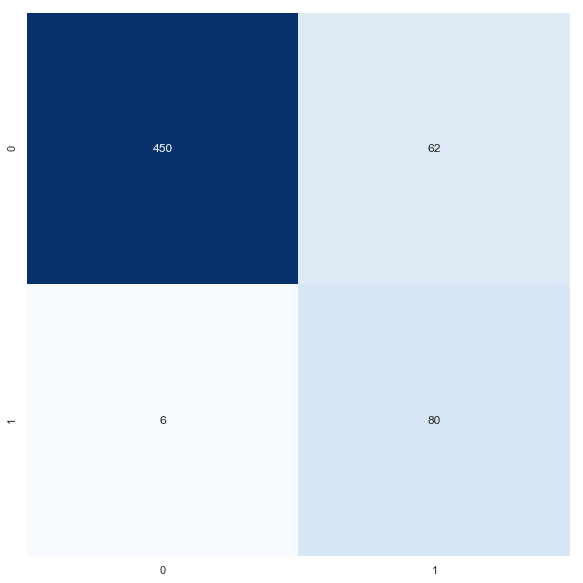

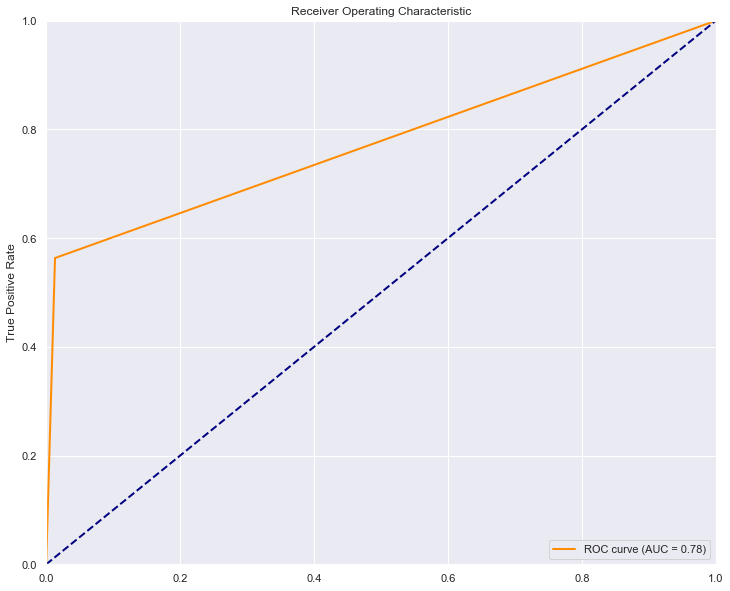

In [44]:
best_model, pred = best_tree_model(X_train, y_train)

plot_confusion(y_train, pred)

plot_roc_curve(y_train, pred)





### *The Default decision tree is the best model*


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

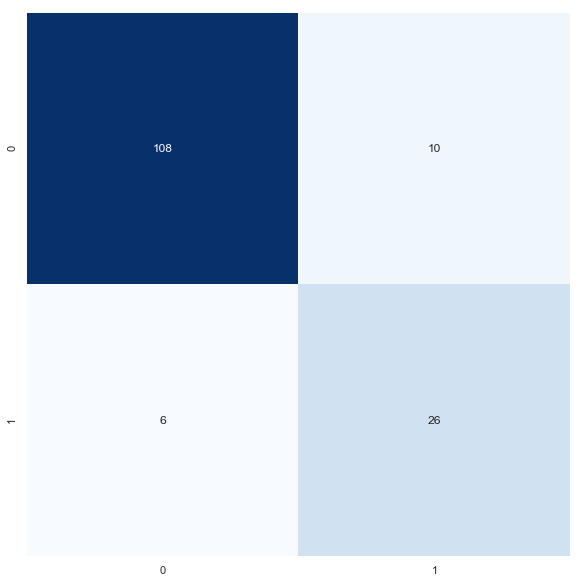

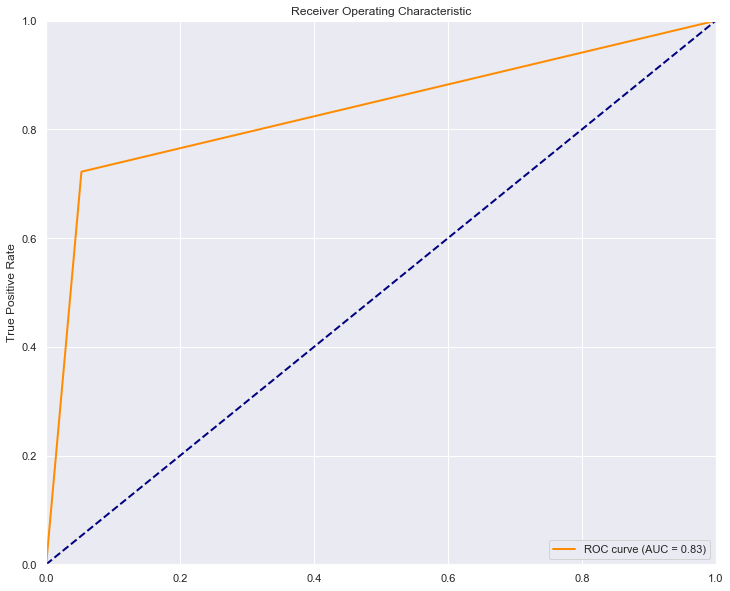

In [45]:
# ANSWER

# Optimised model
best_model, pred = best_tree_model(X_test, y_test)

plot_confusion(y_test, pred)

plot_roc_curve(y_test, pred)




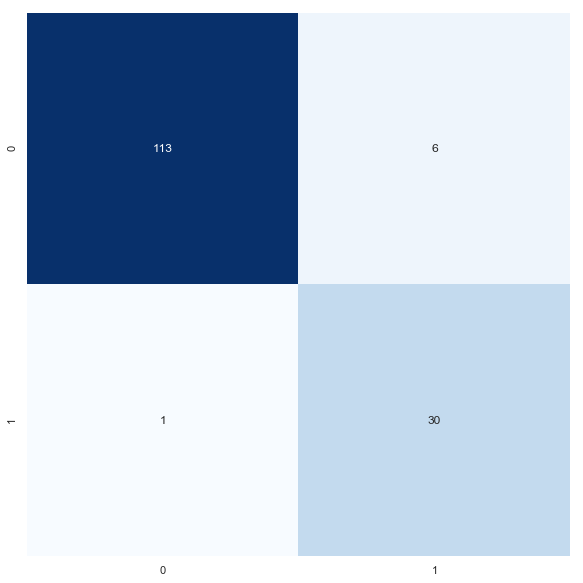

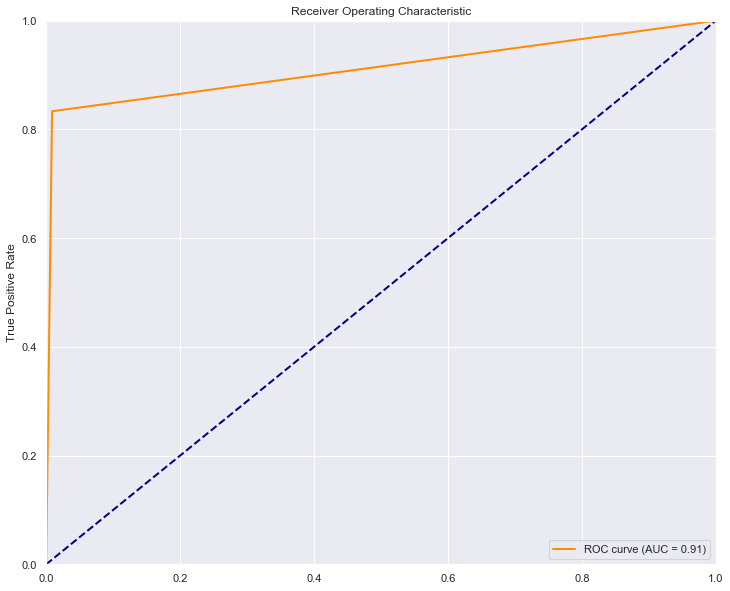

In [46]:
# Default model
model, pred = train_predict_model(X_test, y_test)

plot_confusion(y_test, pred)

plot_roc_curve(y_test, pred)


### The defaul model performs the best

# Step 12 [BONUS]: Visualize Tree

We can also export the tree in Graphviz format using the export_graphviz exporter. If you use the conda package manager, the graphviz binaries

and the python package can be installed with

    conda install python-graphviz

Alternatively binaries for graphviz can be downloaded from the graphviz project homepage, and the Python wrapper installed from pypi with pip install graphviz.

    pip install graphviz

Below is an example graphviz export of the above tree trained on the entire iris dataset; the results are saved in an output file blood-transfusion-service-center.pdf:

In [47]:
from sklearn.tree import export_graphviz
import graphviz 
from sklearn import tree

In [48]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Beau\\Anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\'

In [49]:
os.environ["PATH"]

'C:\\Users\\Beau\\Anaconda3;C:\\Users\\Beau\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\Beau\\Anaconda3\\Library\\usr\\bin;C:\\Users\\Beau\\Anaconda3\\Library\\bin;C:\\Users\\Beau\\Anaconda3\\Scripts;C:\\Program Files\\Microsoft MPI\\Bin\\;C:\\Program Files (x86)\\Intel\\iCLS Client\\;C:\\Program Files\\Intel\\iCLS Client\\;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files\\Microsoft SQL Server\\130\\Tools\\Binn\\;C:\\Program Files\\Microsoft SQL Server\\110\\Tools\\Binn\\;C:\\Program Files\\Microsoft SQL Server\\120\\Tools\\Binn\\;C:\\Program Files\\Git\\cmd;C:\\Program Files\\dotnet\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\

In [50]:
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("blood-transfusion-service-center")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'blood-transfusion-service-center'], make sure the Graphviz executables are on your systems' PATH

The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

In [ ]:
# ANSWER
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=features,  
                      class_names=outcome,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 